<a href="https://colab.research.google.com/github/rajeshmay09/MalariaTransfer/blob/main/Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing import image
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.models import load_model , Model

In [ ]:
train_dir = '/content/drive/MyDrive/TRAIN'
test_dir = '/content/drive/MyDrive/TEST'

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.5
)

In [ ]:
batch_size = 64
image_size = 130

In [ ]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 2 classes.


In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 10000 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.InceptionV3(
    input_shape=(130,130,3),
    include_top=False,
    weights="imagenet",
)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Activation('relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = model.fit(train_generator, epochs=25, validation_data= test_generator, steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),)

Epoch 1/25
625/625 [==============================] - 1193s 131ms/step - loss: 0.3590 - accuracy: 0.8382 - val_loss: 0.2795 - val_accuracy: 0.9359
Epoch 2/25
625/625 [==============================] - 296s 133ms/step - loss: 0.2073 - accuracy: 0.9303 - val_loss: 0.2447 - val_accuracy: 0.9290
Epoch 3/25
625/625 [==============================] - 295s 134ms/step - loss: 0.2183 - accuracy: 0.9292 - val_loss: 0.2464 - val_accuracy: 0.9210
Epoch 4/25
625/625 [==============================] - 296s 131ms/step - loss: 0.2088 - accuracy: 0.9308 - val_loss: 0.2404 - val_accuracy: 0.9250
Epoch 5/25
625/625 [==============================] - 295s 131ms/step - loss: 0.1979 - accuracy: 0.9328 - val_loss: 0.2394 - val_accuracy: 0.9309
Epoch 6/25
625/625 [==============================] - 292s 132ms/step - loss: 0.2152 - accuracy: 0.9281 - val_loss: 0.2384 - val_accuracy: 0.9361
Epoch 7/25
625/625 [==============================] - 289s 133ms/step - loss: 0.2264 - accuracy: 0.9237 - val_loss: 0.2205 

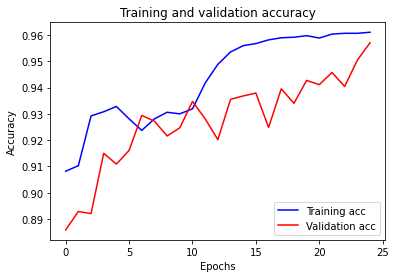

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc ="lower right")
plt.show()

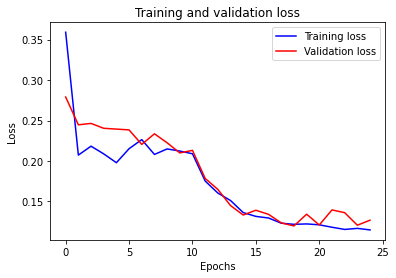

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc ="upper right")
plt.show(

In [ ]:
from keras.models import load_model
model.save('/content/InceptionV3_malaria.h5')

**Prediction**

In [ ]:
classes = {
    0 :"parasitized_cell",
    1 : "uninfected_cell"


}

In [ ]:
img2='/content/drive/MyDrive/TEST/Uninfected/C1_thinF_IMG_20150604_104722_cell_73000 (4280)4.png'

In [ ]:
custom = image.load_img(img2, target_size=(130,130,3))

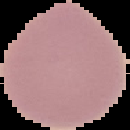

In [ ]:
custom

In [ ]:
custom_arrayformat = image.img_to_array(custom)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom , axis=0)


In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict]

1/1 [==============================] - 0s 18ms/step


'uninfected_cell'

In [ ]:
img5='/content/drive/MyDrive/TEST/Parasitized/C116P77ThinF_IMG_20150930_171739_cell_92.png'

In [ ]:
custom1 = image.load_img(img5, target_size=(130,130,3))

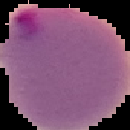

In [ ]:
custom1

In [ ]:
custom_arrayformat = image.img_to_array(custom1)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom1 , axis=0)

In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict]

1/1 [==============================] - 0s 21ms/step


'parasitized_cell'

**Classification Report**

In [ ]:
pred_probabilities = model.predict(test_generator)

625/625 [==============================] - 145s 232ms/step


In [ ]:
pred_probabilities

array([[4.5333654e-03],
       [1.4183078e-04],
       [1.2377678e-05],
       ...,
       [4.4205156e-01],
       [9.9504930e-01],
       [9.9564993e-01]], dtype=float32)

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.8
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5000
           1       0.97      0.92      0.94      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
confusion_matrix(test_generator.classes,predictions)

array([[4844,  156],
       [ 393, 4607]])